In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
from NODE_fns import sigma_biaxial_vmap, sigma_split_vmap
import pickle

## Test against the training data

In [4]:
# Material parameters:
mu = 77.77 #=shear_mod
K = 10000
with open('saved/Psi_eq_params.npy', 'rb') as f:
    params = pickle.load(f)

In [16]:
with open('training_data/gov_data.npy','rb') as f:
    time, lm1, lm2, sgm_x, sgm_y = np.load(f)
lm1 = lm1[:,-1]
lm2 = lm2[:,-1]
lm3 = 1/(lm1*lm2)
J = lm1*lm2*lm3

In [17]:
F = np.zeros([lm1.shape[0],3,3])
F[:,0,0] = lm1
F[:,1,1] = lm2
F[:,2,2] = lm3
sigma_pr = sigma_biaxial_vmap(lm1, lm2, params)

b = np.einsum('pij,pjk->pik', F, F)
sigma_gt2 = np.zeros_like(b)
for i in range(sigma_gt2.shape[0]):
    sigma_gt2[i] = mu/J[i]*(b[i]-np.eye(3)) + 2*K*(J[i]-1)*np.eye(3)

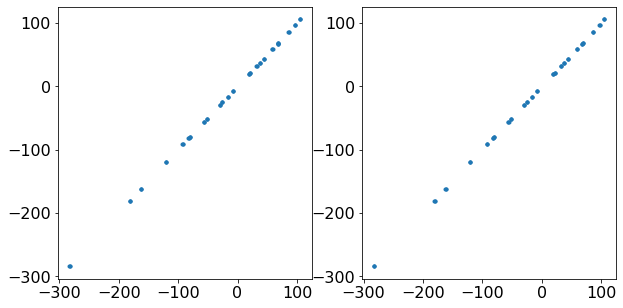

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(sgm_x[:,-1], sigma_pr[:,0,0], '.')
ax[1].plot(sgm_y[:,-1], sigma_pr[:,1,1], '.')

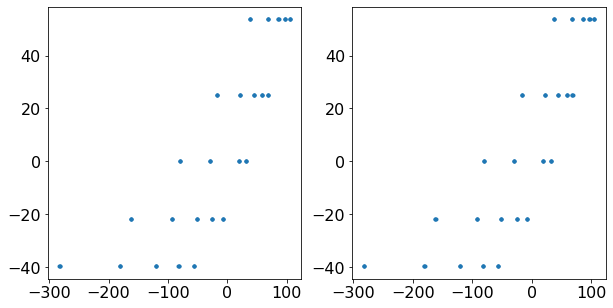

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(sgm_x[:,-1], sigma_gt2[:,0,0], '.')
ax[1].plot(sgm_y[:,-1], sigma_gt2[:,1,1], '.')

## Test against the entire input space

In [2]:
lm1 = lm2 = np.linspace(0.9,1.2,21)
lm1, lm2 = np.array(np.meshgrid(lm1, lm2))
lm1 = lm1.reshape(-1)
lm2 = lm2.reshape(-1)
lm3 = 1/(lm1*lm2)

In [5]:
J = lm1*lm2*lm3
b = np.zeros([lm1.shape[0],3,3])
b[:,0,0] = lm1**2
b[:,1,1] = lm2**2
b[:,2,2] = lm3**2

sigma_gt = np.zeros_like(b)
for i in range(sigma_gt.shape[0]):
    sigma_gt[i] = mu/J[i]*(b[i]-np.eye(3)) + 2*K*(J[i]-1)*np.eye(3)

In [10]:
# sigma_pr = sigma_biaxial_vmap(lm1, lm2, params)
sigma_pr = sigma_split_vmap(lm1, lm2, lm3, params)

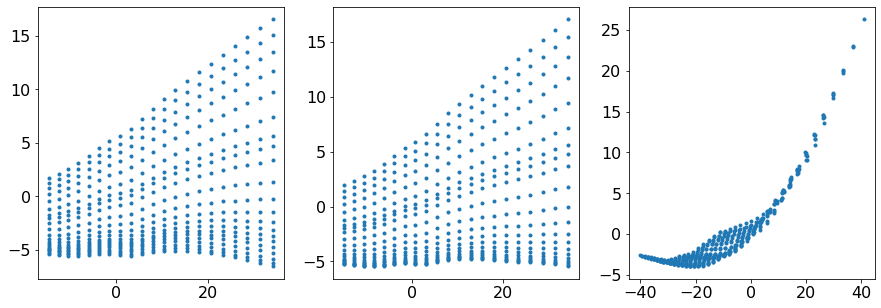

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(sigma_gt[:,0,0], sigma_pr[:,0,0], '.')
ax[1].plot(sigma_gt[:,1,1], sigma_pr[:,1,1], '.')
ax[2].plot(sigma_gt[:,2,2], sigma_pr[:,2,2], '.')